# COMMUNICATING RESULTS

# DO WORK
- Open up the lesson 10 notebook
- Complete your mid-course survey if you haven't already

# LEARNING OBJECTIVES

- Explain the trade-offs between the precision and recall of a model while articulating the cost of false positives vs. false negatives
- Describe the difference between visualization for presentations vs. exploratory data analysis
- Identify the components of a concise, convincing report and how they relate to specific audiences/stakeholders




# PRE-WORK REVIEW

Understand results from a confusion matrix and measure true positive rate and false positive rate

Create and interpret results from a binary classification problem

Know what a decision boundary is


# BACK TO THE CONFUSION MATRIX
Objective: Review what a confusion matrix is and how to estimate one

- Confusion matrices allow for the interpretation of correct and incorrect predictions for each class label. 
  - This is particularly important if you have a lot of classes rather than just two classes
    
Let’s recall our confusion matrix.
![confusion matrix](assets/images/confusion_matrix.png)
Confusing, right? Here's the version we used that matches with Scikit-learn

<table width=150px style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom"></td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">True Negatives</td>
    <td style="text-align: center">False Positives</td>
    <td style="text-align: center">N</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">False Negatives</td>
    <td style="text-align: center">True Positives</td>
    <td style="text-align: center">P</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">No</td>
    <td style="text-align: center">Yes</td>
</tr>

</table>

## ACTIVITY:  KNOWLEDGE CHECK
Without looking at the previous slide, how do we calculate the following?
- Accuracy
- True Positive Rate
- False Positive Rate
- Can you guess what the True Negative Rate would be?

The answer is below, try not to peek too much.

Answer:
$$accuracy = \frac{TP + TN}{P + N} = \frac{TP + TN}{Total}$$

$$True~Positive~Rate = \frac{FP}{N}$$

$$False~Positive~Rate = \frac{TP}{P}$$

$$True~Negative~Rate = \frac{TN}{N} = 1 - FPR$$

**Let's load in some data to work with today** 

We will revisit the iris from the KNN lesson

In [1]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model
from sklearn import dummy

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
# Load in pre-packaged data from sklearn and convert to Pandas DF
iris = datasets.load_iris()

# Convert feature data to DataFrame
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)

# Convert outcome data to DataFrame
iris_outcome = pd.DataFrame(iris.target, columns=['species'])

# We need to put the outcome and data together if we want to explore it
# They have matching indicies, so let's join them by index
irisdf = irisdf.join(iris_outcome)

# The variable names are annoying, let's change them
irisdf.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [3]:
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# List out the features we will use for our model
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [5]:
# Keep only classes 1 and 2 for this run
X = irisdf[irisdf.species.isin([1,2])][features]

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [9]:
# Keep only classes 1 and 2 for this run
# Rename 1 and 2 to 0 and 1 so sklearn understands the classes
y = irisdf[irisdf.species.isin([1, 2])].species.replace({1:0,2:1})

In [10]:
y.head()

50    0
51    0
52    0
53    0
54    0
Name: species, dtype: int32

In [20]:
# Train a logistic model using a train_test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, random_state=42)
logit= linear_model.LogisticRegression().fit(X_train, y_train)

In [21]:
logit.coef_

array([[-1.41070833, -1.73612193,  2.30046199,  2.21752179]])

In [22]:
# Create predicted classes and probabilities
y_pred= logit.predict(X_test)
y_pred_proba= logit.predict_proba(X_test)

In [23]:
# Preview first 5 predicted probabilities and go over what the two columns mean
y_pred_proba[:5]

array([[ 0.43114063,  0.56885937],
       [ 0.12796483,  0.87203517],
       [ 0.13117382,  0.86882618],
       [ 0.87645423,  0.12354577],
       [ 0.74566293,  0.25433707]])

In [24]:
metrics.confusion_matrix(y_test,y_pred)

array([[11,  3],
       [ 0, 11]])

In [ ]:
# Let's get a confusion matrix for this data


In [25]:
# Let's get the area under the curve
metrics.roc_auc_score(y_test, y_pred_proba[:,1])

0.95454545454545459

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1])

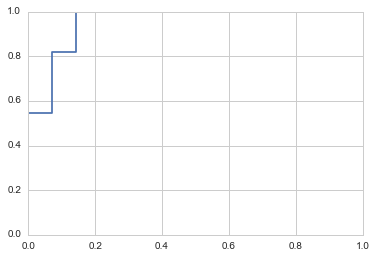

In [29]:
plt.figure()
plt.plot(fpr, tpr)

### KNOWLEDGE CHECK

Does that look like a good or bad AUC to have?

# PRECISION AND RECALL
Objective: Introduce Precision and Recall to formally replace TPR and FPR

We've indirectly spoken about precision and recall

- **Recall/True Positive Rate** asks "Given a positive example, will the classifier detect it"
 - Consider the **True Negative Rate** which asks "Given a negative example, will the classifier detect it"
 - Which differs from **False Positive Rate** which asks "Given a positive example, will the classifier get it wrong"
 - The True Negative Rate = (1 - FPR)
 - These all relate to the **Recall/TPR - Sensitivity** trade-off that we indirectly talked about last class
 
Notice that we ask these questions from the perspective of data that we have trained or tested on. **Knowing the actual values, how did our model do?**

**What if we want to know how likely it is that a model's prediction is correct?**

- **Precision** asks "Given a positive prediction from the classifier, how likely is it to be correct ?"
$$\frac{TP}{TP+FP}$$

**Recall** aims to see how well a model returns specific data (literally, checking whether the model can recall what a class label looked like).

**Precision** aims to produce a high amount of relevancy (literally, checking how precise our predictions are).

## ACTIVITY:  KNOWLEDGE CHECK

If the goal of the “recall” metric is to identify specific values of a class correctly, what other metric performs a similar calculation?

<!--
True Negative Rate is just 'recall' for the negative class! Actually, when we think about this more broadly in the multi-class situation we care about how well we recall any particular class.
-->

In [30]:
# Let's get a confusion matrix for this data
metrics.confusion_matrix(y_test, y_pred)

array([[11,  3],
       [ 0, 11]])

In [31]:
# There's a great, more general, feature called classification report
print metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       1.00      0.79      0.88        14
          1       0.79      1.00      0.88        11

avg / total       0.91      0.88      0.88        25



In [36]:
precision = float(11.0/(11.0+3.0))
print precision

0.785714285714


### KNOWLEDGE CHECK
Calculate precision and recall from the confusion matrix and much sure your answer matches

## THE DIFFERENCE BETWEEN PRECISION AND RECALL
The key difference between the two is whether we attribute error to false postives or false negatives.

Should our model be more pick in avoiding false positives (precision)?

Or should it be more pick in avoiding false negatives (recall)?

The answer should be determined by the problem you’re trying to solve.

**This sounds a lot like balancing TPR and FPR?**

They are very similar, but you should use precision and recall rather than TPR and FPR.

### PRECISION-RECALL TRADEOFF

We can trade **Precision and Recall** in a similar manner to **Sensitivity and Specificity**. 

Remember:
- Recall = Sensitivity
- Specificity = 1 - FPR

# MULTICLASS PROBLEMS
Objective: Discuss how to estimate and evaluate multiclass problem at a shallow level

**What do we do when we have more than two class labels?**

- Some algorithms inherently support multiple classes:
  - Inherently multiclass: Naive Bayes, LDA and QDA, Decision Trees, Random Forests, Nearest Neighbors, and Logistic Regression with the correct approach
- Otherwise we split the the multiclass problem into a binary problem

**How can we split a mutliclass problem into a set of binary problems?**

Again, there are two major approaches to pay attention to.
- One vs Rest
- One vs One

### One vs Rest

We train a separate model for each class and predict the one with the largest probability for a given sample

1. Construct a k models for k classes where the positive class is the target class and all other observations are the negative class
2. Use all models to make predict probabilities on a new sample. 
3. Choose the class that has the highest probability

### One vs One

We train a model for each pair of classes and have them vote on which class to use.

1. Train k(k-1)/2 models on k classes. That gives you k(k - 1)/2 binary classification problems
2. Use all models to predict the class of a new sample. Each model will vote for a class
3. Choose the class with the most number of votes

### Which one should I use?

That's not necessarily clear and both approaches perform well. Scikit-learn mostly uses One vs Rest by default with a few exceptions.

### KNOWLEDGE CHECK

I've trained 4 Support Vector Machines in a One vs. Rest fashion.

On a new prediction, the classifiers tell me the following probabilities
- class 0: .19
- class 1: .175
- class 2: .22
- class 3: .18

What class do we predict for this sample?

In [37]:
# Create a Logistic Regression model to predict the species type
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = irisdf[irisdf.species.isin([0, 1, 2])][features]
y = irisdf[irisdf.species.isin([0, 1, 2])]['species']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.5, random_state=5)
logit = linear_model.LogisticRegression(multi_class='ovr').fit(X_train, y_train)

In [38]:
y_pred = logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)

In [39]:
y_pred_proba[:5]

array([[  1.15101346e-01,   6.14930948e-01,   2.69967707e-01],
       [  1.60930692e-03,   4.12766295e-01,   5.85624398e-01],
       [  2.41680884e-03,   1.86916868e-01,   8.10666323e-01],
       [  8.78597373e-01,   1.20545951e-01,   8.56675708e-04],
       [  1.62488063e-03,   1.70754668e-01,   8.27620451e-01]])

### EVALUATING MULTICLASS PROBLEMS

Most of our metrics aside from Accuracy do not naturally extend to multiple classes.

**Generally, you should focus on Accuracy when evaluating multiclass problems.**

However, we can take a closer look using other metrics, but we work on a class by class basis.

In [40]:
metrics.confusion_matrix(y_test, y_pred)

array([[22,  0,  0],
       [ 0, 21,  8],
       [ 0,  0, 24]])

In [ ]:
replacement = {0:1, 1:0, 2:0}
metrics.confusion_matrix(y_test.replace(replacement), 
                         pd.Series(y_pred).replace(replacement))

In [41]:
replacement = {0:0, 1:1, 2:0}
metrics.confusion_matrix(y_test.replace(replacement), 
                         pd.Series(y_pred).replace(replacement))

array([[46,  0],
       [ 8, 21]])

In [42]:
replacement = {0:0, 1:0, 2:1}
metrics.confusion_matrix(y_test.replace(replacement), 
                         pd.Series(y_pred).replace(replacement))

array([[43,  8],
       [ 0, 24]])

In [43]:
print metrics.accuracy_score(y_test, y_pred)

0.893333333333


In [44]:
# The simple way however is to let Sklearn summarize what we are interested in
print metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       1.00      0.72      0.84        29
          2       0.75      1.00      0.86        24

avg / total       0.92      0.89      0.89        75



# BREAK

# COST BENEFIT ANALYSIS
Objective: Learn the relevant factors in choosing a proper Precision and Recall

## ACTIVITY: COST BENEFIT ANALYSIS
DIRECTIONS (15 minutes)
EXERCISE

One tool that complements the confusion matrix is cost-benefit analysis, where you attach a value to correctly and incorrectly predicted data.

Like the Precision-Recall trade off, there is a balancing point to the probabilities of a given position in the confusion matrix, and the cost or benefit to that position. This approach allows you to not only add a weighting system to your confusion matrix, but also to speak the language of your business stakeholders (i.e. communicate your values in dollars!).


### ACTIVITY: COST BENEFIT ANALYSIS
Consider the following marketing problem:

As a data scientist working on marketing spending, you've built a model that reduces user churn--the number of users who decide to stop paying for a product--through a marketing campaign. Your model generates a confusion matrix with the following probabilities (these probabilities are calculated as the value in that position over the sum of the sample):

<table width=150px style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom"></td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN:0.5</td>
    <td style="text-align: center">FP:0.2</td>
    <td style="text-align: center">N</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN: 0.1</td>
    <td style="text-align: center">TP: 0.2</td>
    <td style="text-align: center">P</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">No</td>
    <td style="text-align: center">Yes</td>
</tr>

</table>

In this case: 
The benefit of a true positive is the retention of a user (\$10 for the month) 
The cost of a false positive is the spend of the campaign per user (-$0.05) 
The cost of a false negative (someone who could have been retained if the campaign was sent to them) is, effectively, 0 (we didn't send it... but we certainly didn't benefit!) 
The benefit of a true negative is 0: No spend on users who would have never retained.

To calculate Cost-Benefit, we'll use this following function:

$$(P(TP) * B(TP)) + (P(TN) * B(TN)) + (P(FP) * C(FP)) + (P(FN) * C(FN))$$

which for our marketing problem, comes out to this:

$$(.2 * 10) + (.5 * 0) - (.2 * .05) - (.1 * 0)$$

or $1.99 per user targeted.


1. Think about precision, recall, and cost benefit analysis to answer the following questions:

2. How would you rephrase the business problem if your model was optimizing toward precision? i.e., How might the model behave differently, and what effect would if have?

3. How would you rephrase the business problem if your model was optimizing toward recall?

4. What would the most ideal model look like in this case?

# COMMUNICATING RESULTS
Objective: Quickly review how to give a good presentation

## WE BUILT A MODEL!  NOW WHAT?

We’ve built our model, but there is still a gap between your Notebook with plots/figures and a presentation of your results.

Classes so far have focused on two core concepts:
- developing consistent practices
- interpreting metrics to evaluate and improve model performance

But what does that mean to your audience?

**Imagine how a non-technical audience might respond to the following statements:**

- The predictive model I built has an accuracy of 80%.
  - Is that good or bad?
- Logistic regression was optimized with L2 regularization.
  - What?
- Gender was more important than age in the predictive model because it has a larger coefficient.
  -  I guess that sounds right, we should focus on gender
- Here’s the AUC chart that shows how well the model did.
  - What?

***BASIC PRESENTATION SKILLS***

Who is your audience? Are they technical? What are their concerns?

Remember: in a business setting, you may be the only person who can interpret what you’ve built.

Some people may be familiar with basic visualization, but you will likely have to do a lot of “hand holding”.

You need to be able to efficiently explain your results in a way that makes sense to all stakeholders (technical or not).


Today, we’ll focus on communicating results for “simpler” problems, but this applies to any type of model you may work with.

First, let’s review classification metrics, review our knowledge, and talk about how we might communicate what we know.

## SHOWING WORK

We’ve spent a lot of time exploring our data and building a reasonable model that performs well.

However, if we look at our visuals, they are most likely:

- Statistically heavy:  Most people don’t understand histograms.
- Overly complicated:  Scatter matrices produce too much information.
- Poorly labeled:  Code doesn’t require adding labels, so you may not have added them.

**In order to convey important information to our audience, make sure our charts are:**

- Simplified
- Easily interpretable
- Clearly labeled


## SIMPLIFIED

At most, you’ll want to include figures that either explain a variable on its own or explain that variable’s relationship with a target.

If your model used a data transformation (like natural log), just visualize the original data.

Try to remove any unnecessary complexity.


## EASILY INTERPRETABLE

Any stakeholder looking at a figure should be seeing the exact same thing you’re seeing.

A good test for this is to share the visual with others less familiar with the data and see if they come to the same conclusion.

How long did it take them?


## CLEARLY LABELED

Take the time to clearly label your axis, title your plot, and double check your scales - especially if the figures should be comparable.

If you’re showing two graphs side by side, they should follow the same Y axis.


## QUESTIONS TO ASK

**When building visuals for another audience, ask yourself these questions:**

- Who:  Who is my target audience for the visual?

- What:  What do they already know about this project?  What do they need to know?

- How:  How does my project affect this audience?  How might they interpret (or misinterpret) the data?

# DEMO: VISUALIZING MODELS OVER VARIABLES
Objective: Implant the idea of using charts to explore models, predictions, and residuals

One effective way to explain your model over particular variables is to plot the predicted values against the most explanatory variables.

For example, in logistic regression, plotting the probability of a class against a variable can help explain the range of effect of the model.



We’ll use the flight delay data for all following examples.  Let’s build our first model and plot.

Open the starter code from the class repo and follow along.


In [45]:
# read in the file and generate a quick model (assume we've done the data exploration already)
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

df = pd.read_csv('assets/dataset/flight_delays.csv')

df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
df = df[df.DEP_DEL15.notnull()].copy()

In [46]:
# Build a model
model = lm.LogisticRegression()
features = ['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6']
model.fit(df[features + ['CRS_DEP_TIME']], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features + ['CRS_DEP_TIME']]).T[1]

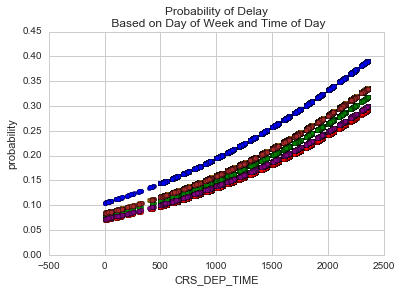

In [47]:
# Create a plot
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')

This visual can help showcase the range of effect on delays from both day of the week and time of day.

Given this model, some days are more likely to have delays than others.

The likelihood of delay increases as the day goes on.


This visual can help showcase the range of effect on delays from both day of the week and time of day.

Given this model, some days are more likely to have delays than others.

The likelihood of delay increases as the day goes on.

# DEMO: VISUALIZING PERFORMANCE AGAINST BASELINE

Another approach of visualization is the effect of your model against a baseline, or - even better - against previous models.

Plots like this will also be useful when talking to your peers - other data scientists or analysts who are familiar with your project and interested in the progress you’ve made.

For classification, we’ve practiced plotting AUC plots.  Consider the premise of each:
AUC plots explain and represent “accuracy” as having the largest area under the curve. Good models will be high and to the left.

When comparing multiple models:

For AUC plots, you’ll be interested in which model has the largest area under the curve.

We’ve plotted several models for AUC: a dummy model and additional features.

In [48]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:-1]], df.DEP_DEL15)
df['probability_0'] = model0.predict_proba(df[features[1:-1]]).T[1]

model = lm.LogisticRegression()
model.fit(df[features[1:-1]], df.DEP_DEL15)
df['probability_1'] = model.predict_proba(df[features[1:-1]]).T[1]

[(0, 1),
 (0, 1),

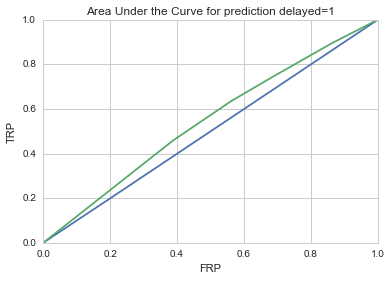

In [49]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='TRP', xlabel='FRP', xlim=(0, 1), ylim=(0, 1))

The model using data outperforms a baseline dummy model.

By adding other features, there’s some give and take with probability as the model gets more complicated.

# BREAK

## ACTIVITY: TRY IT OUT (15 min)

Objective: Have a chance to reinforce our knowledge of the confusion matrix and related concepts

In a similar approach, use the sklearn [precision_recall_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) function to enable you to plot the precision-recall curve of the four models from above.
Explain what is occurring when the recall is below 0.2.
Based on this performance, is there a clear winner at different thresholds?


Bonus:  Redo both the AUC and precision-recall curves using models that have been cross validated using kfold. How do these new figures change your expectations for performance?

DELIVERABLE
The new plots and associated answers

# INDEPENDENT PRACTICE

## ACTIVITY: PROJECT PRACTICE
Objective: Review content thus far in the course, bring the material together, find weak areas, and get help in class.

Using the flights data from the last example try to make it through the data science workflow in the time we have left in class.

There are many ways to manipulate this data set: 
- Consider what is a proper "categorical" variable, and keep only what is significant. 
- You will easily have 20+ variables (start with one). Aim to have at least three visuals that clearly explain the relationship of variables you've used against the predictive survival value.
- Generate the AUC or precision-recall curve (based on which you think makes more sense), and have a statement that defines, compared to a baseline, how your model performs and any caveats.  
  - For example: "My model on average performs at x rate, but the features under-perform and explain less of the data at these thresholds." Consider this as practice for your own project, since the steps you'll take to present your work will be relatively similar.
  
[Pandas super cheatsheet](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)


In [50]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7,probability,probability_0,probability_1
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.129859,0,0.174364
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.129859,0,0.174364
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.159201,0,0.174364
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.158238,0,0.174364
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166576,0,0.174364


In [67]:
df.UNIQUE_CARRIER.value_counts()

WN    98307
DL    63752
EV    48267
OO    46946
AA    43173
UA    37454
US    32552
MQ    27670
B6    20531
AS    13198
NK     8647
F9     6745
HA     6418
VX     4651
Name: UNIQUE_CARRIER, dtype: int64

In [53]:
df.columns

Index([u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE', u'UNIQUE_CARRIER',
       u'AIRLINE_ID', u'CARRIER', u'ORIGIN_AIRPORT_ID',
       u'ORIGIN_AIRPORT_SEQ_ID', u'ORIGIN_CITY_MARKET_ID', u'DEST_AIRPORT_ID',
       u'DEST_AIRPORT_SEQ_ID', u'DEST_CITY_MARKET_ID', u'CRS_DEP_TIME',
       u'DEP_TIME', u'DEP_DEL15', u'Unnamed: 15', u'dow_1', u'dow_2', u'dow_3',
       u'dow_4', u'dow_5', u'dow_6', u'dow_7', u'probability',
       u'probability_0', u'probability_1'],
      dtype='object')

In [57]:
df = df.join(pd.get_dummies(df['UNIQUE_CARRIER'], prefix='airline'))
df = df[df.DEP_DEL15.notnull()].copy()

In [68]:
features = ['airline_WN','airline_DL','airline_EV','airline_OO','airline_AA','airline_UA']

In [66]:
df.describe()

c:\Users\korol_000\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,...,airline_EV,airline_F9,airline_HA,airline_MQ,airline_NK,airline_OO,airline_UA,airline_US,airline_VX,airline_WN
count,458311.000000,458311.000000,458311.000000,458311.000000,4.583110e+05,458311.000000,458311.000000,4.583110e+05,458311.000000,458311.000000,...,458311.000000,458311.000000,458311.000000,458311.000000,458311.000000,458311.000000,458311.000000,458311.000000,458311.000000,458311.000000
mean,15.803053,4.048024,19977.381106,12671.392175,1.267142e+06,31714.487246,12671.782322,1.267181e+06,31715.865238,1323.662952,...,0.105315,0.014717,0.014004,0.060374,0.018867,0.102433,0.081722,0.071026,0.010148,0.214498
std,8.921022,1.929048,399.158330,1519.173651,1.519171e+05,1286.064137,1519.250986,1.519248e+05,1286.731887,467.693510,...,0.306959,0.120418,0.117505,0.238178,0.136056,0.303217,0.273941,0.256869,0.100226,0.410474
min,1.000000,1.000000,19393.000000,10135.000000,1.013503e+06,30070.000000,10135.000000,1.013503e+06,30070.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,19790.000000,11292.000000,1.129202e+06,30615.000000,11292.000000,1.129202e+06,30615.000000,925.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,4.000000,19977.000000,12889.000000,1.288903e+06,31453.000000,12889.000000,1.288903e+06,31453.000000,1320.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,6.000000,20366.000000,13930.000000,1.393003e+06,32467.000000,13930.000000,1.393003e+06,32467.000000,1720.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,7.000000,21171.000000,16218.000000,1.621801e+06,35991.000000,16218.000000,1.621801e+06,35991.000000,2359.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
X= df[features]
y= df['DEP_DEL15']

In [70]:
logistic = lm.LogisticRegression().fit(X,y)


In [71]:
logit.coef_

array([[ 0.39570205,  1.22264523, -1.92113131, -0.86124504],
       [ 0.17747535, -1.13962587,  0.55584066, -1.01414571],
       [-1.28412187, -0.99433252,  1.79696868,  1.88141256]])

# TOPIC REVIEW

What do precision and recall mean? How are they similar and different to True Positive Rate and False Positive Rate?

How does cost benefit analysis play a role in building models?

What are at least two very important details to consider when creating visuals for a project's stakeholders?

Why would an AUC plot work well for a data science audience but not for a business audience? What would be a more effective visualization for that group?



# BEFORE NEXT CLASS
UPCOMING

Project:  Unit Project 4 DUE Monday
https://github.com/ga-students/DS-DC-14/tree/master/projects/unit-projects/project-4



# LESSON: COMMUNICATING RESULTS
EXIT TICKET 

DON’T FORGET TO FILL OUT YOUR EXIT TICKET

http://goo.gl/forms/gG5qAw9QljgkHC2q1